In [1]:
import sampling as smp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import measure
%matplotlib inline

In [2]:
training = pd.read_msgpack('training.bin')

## Identifying malformed masks

1. Look for unusually narrow masks

In [3]:
np.min(training[training['maskW']>6]['maskW'].values)

49

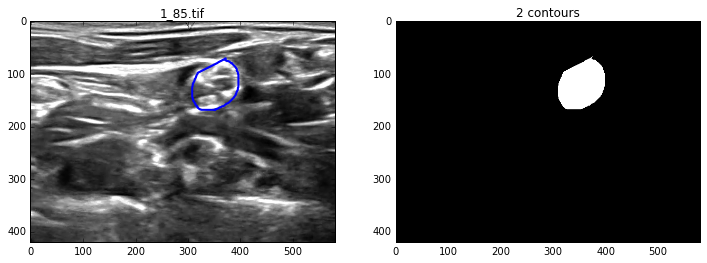

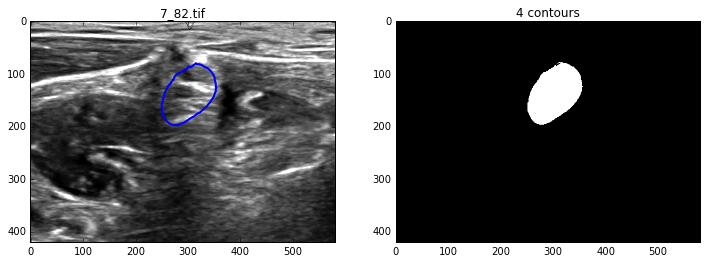

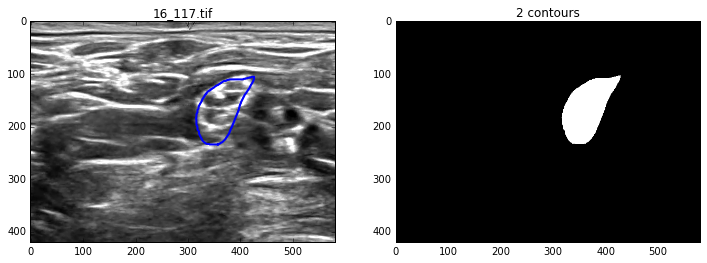

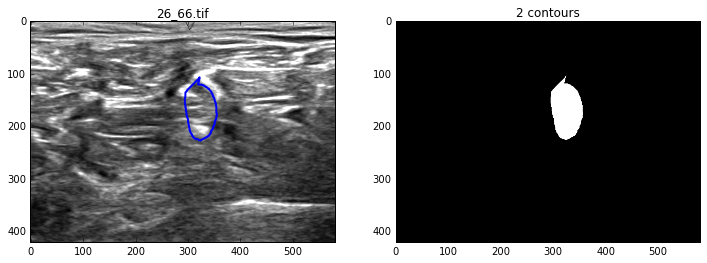

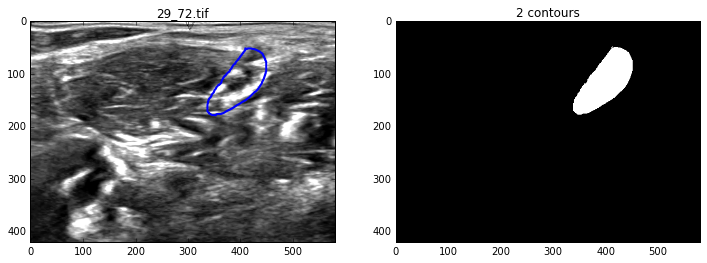

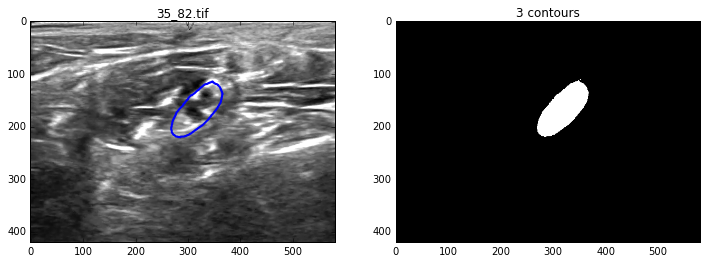

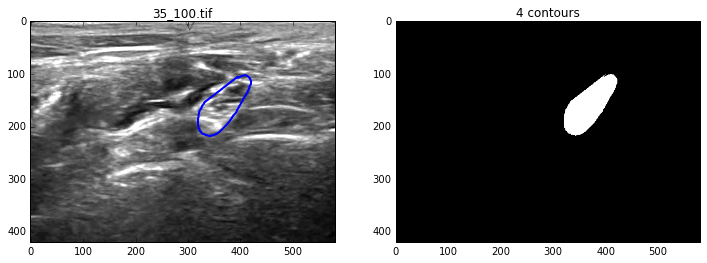

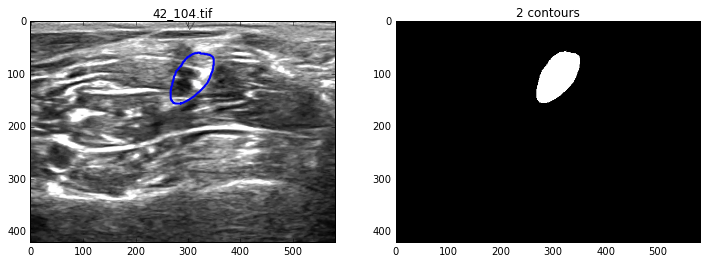

In [4]:
weird = training[(training['maskW']<6) & (training['maskW']>0)]

def plotmany(rows):
    for row in rows.iterrows():
        im = smp.image_pair(row[1]['subject'], row[1]['img'])
        fig, (axi, axm) = plt.subplots(1,2,figsize=(12,8))
        im.plot(ax=axi)
        maskcontour = measure.find_contours(im.mask, 254.5)
        #ic = np.argmax([contour.shape[0] for contour in maskcontour)
        #contour = maskcontour[ic]
        #axi.plot(contour[:,1], contour[:,0])
        im.plotmask(ax=axm)
        axm.set_title('{} contours'.format(len(maskcontour)))
plotmany(weird)

In [19]:
maskcontour

NameError: name 'maskcontour' is not defined

2. Look for unusually short masks

In [58]:
np.min(training[training['maskH']>6]['maskH'].values)

45

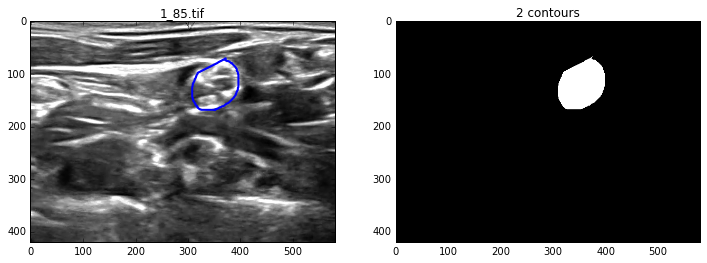

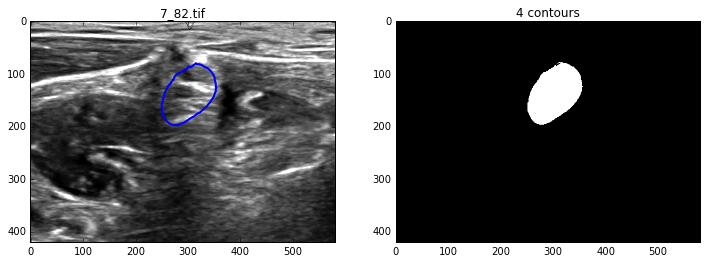

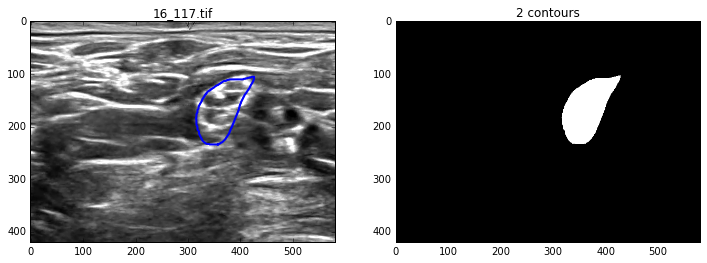

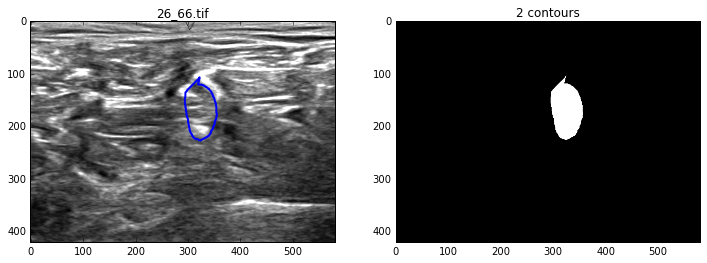

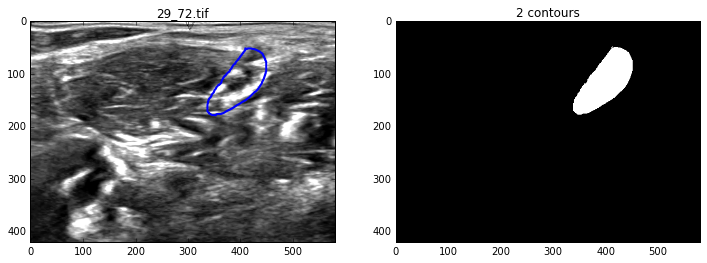

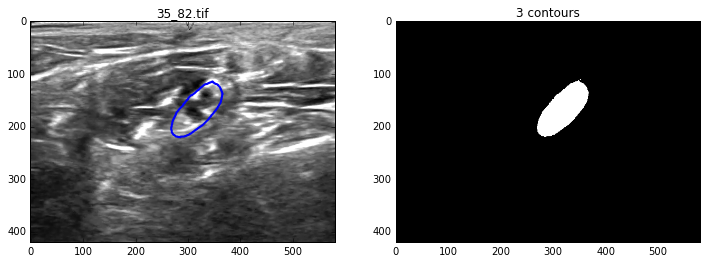

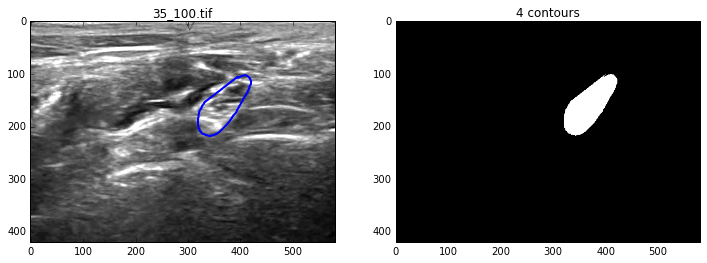

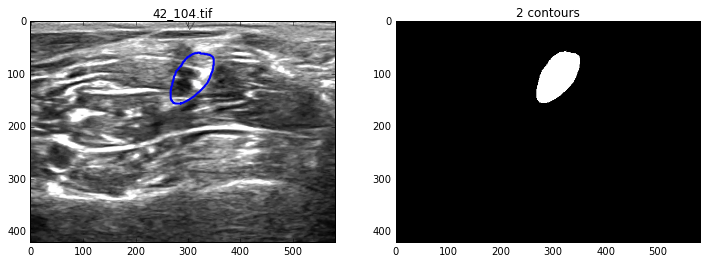

In [5]:
alsoweird = training[(training['maskW']<6) & (training['maskW']>0)]

plotmany(alsoweird)